In [53]:
import urllib.request
from bs4 import BeautifulSoup
import time
import re
from collections import defaultdict
import networkx as nx


def get_line_dict(url):
    html = urllib.request.urlopen(url)
    soup = BeautifulSoup(html, 'lxml')

    line_dict = dict()

    for item in soup.find_all('a',href=re.compile('/item/')):
        if re.match('^北京地铁\w*线', item.text):
            if item.text not in line_dict.keys():
                line_dict[item.text] = item['href']
    return line_dict


def get_line_station(location):
    line_station = {}
    for th in location:
        pass_ways=th.parent.find_next_siblings("tr")
        print('pass_ways:   ',pass_ways)
        for way in pass_ways:
            print('way:     ',way)
            if "——" in str(way.contents[0].text):
                print('way.contents:  ',way.contents)
                source,destination=str(way.contents[0].text).split("——")
                distance = way.contents[1].text
                line_station[(source,destination)] = distance

    return line_station

def get_line_graph(line_dict):
    line_graph = defaultdict() # 
    for line, line_url in line_dict.items():
        line_html = urllib.request.urlopen('https://baike.baidu.com'+line_url)
        soup = BeautifulSoup(line_html, 'lxml')
        location = soup.find_all("th",text=re.compile('起始/终到车站'))
        if location:
            line_graph[line[4:]] = get_line_station(location)


        print('line',line)

    return line_graph

In [54]:
url = 'https://baike.baidu.com/item/%E5%8C%97%E4%BA%AC%E5%9C%B0%E9%93%81/408485'

line_dict = get_line_dict(url)
line_graph = get_line_graph(line_dict)
print(line_graph)

pass_ways:    [<tr><th>苹果园——古城</th><td align="center" valign="center" width="220">2606米</td><td align="center" valign="center" width="142">上行/下行</td></tr>, <tr><th>古城——八角游乐园</th><td align="center" valign="center" width="220">1921米</td><td align="center" valign="center" width="142">上行/下行</td></tr>, <tr><th>八角游乐园——八宝山</th><td align="center" valign="center" width="220">1953米</td><td align="center" valign="center" width="142">上行/下行</td></tr>, <tr><th>八宝山——玉泉路</th><td align="center" valign="center" width="220">1479米</td><td align="center" valign="center" width="142">上行/下行</td></tr>, <tr><th>玉泉路——五棵松</th><td align="center" valign="center" width="220">1810米</td><td align="center" valign="center" width="142">上行/下行</td></tr>, <tr><th>五棵松——万寿路</th><td align="center" valign="center" width="220">1778米</td><td align="center" valign="center" width="142">上行/下行</td></tr>, <tr><th>万寿路——公主坟</th><td align="center" valign="center" width="220">1313米</td><td align="center" valign="center" width="142">上行/下行<

In [66]:
def trans_distance(distance):
    print('distance',distance)
    if '约' in distance:
        distance = distance[1:]
    if '千米' in distance:
        return float(distance[:-2])*1000
    elif '米' in distance:
        return float(distance[:-1])
    else:
        return float(distance)


In [67]:
def all_stations(line_graph):
    all_route_stations= defaultdict(list)
    all_stations_distance = dict()
    all_stations = list()
    
    for line, stations in line_graph.items():
        temp = []
#         print('line,stations:',line,'   ',stations)
        for station, distance in stations.items():
            distance = trans_distance(distance)
#             print('station, distance',station, distance)
            if station[0] not in temp:
                temp.append(station[0])
            if station[1] not in temp:
                temp.append(station[1])
            all_stations_distance[station] = distance
            all_stations
            all_stations_distance[(station[1],station[0])] = distance
            all_stations += temp
            all_route_stations[line] = temp
    all_stations = list(set(all_stations))
    return all_route_stations, all_stations, all_stations_distance

In [68]:
all_route_stations, all_stations, all_stations_distance = all_stations(line_graph)
print('--------------\n',all_route_stations, '--------------\n',all_stations,'--------------\n', all_stations_distance)

distance 2606米
distance 1921米
distance 1953米
distance 1479米
distance 1810米
distance 1778米
distance 1313米
distance 1172米
distance 1166米
distance 1291米
distance 424米
distance 1590米
distance 1217米
distance 925米
distance 852米
distance 774米
distance 1230米
distance 1377米
distance 790米
distance 1385米
distance 1673米
distance 1714米
distance 2839米
distance 1206米
distance 1829米
distance 4866米
distance 2538米
distance 3623米
distance 1423米
distance 2110米
distance 4785米
distance 2272米
distance 6722米
distance 2152米
distance 1110米
distance 1135米
distance 1769米
distance 1715米
distance 1375米
distance 2002米
distance 1894米
distance 1912米
distance 1763米
distance 1700米
distance 1465米
distance 990米
distance 1225米
distance 1257米
distance 776米
distance 939米
distance 965米
distance 1544米
distance 1305米
distance 1286米
distance 3千米
distance 1838米
distance 1122米
distance 1025米
distance 1059米
distance 1151米
distance 866米
distance 791米
distance 1016米
distance 848米
distance 945米
distance 821米
distance 876米
distance 118

In [69]:
def stations_connection(all_stations,all_stations_distance):
    connection = defaultdict(list)
#     print('all_stations---\n',all_stations)
    for sta1 in all_stations:
        for sta2 in all_stations:
            if sta1 == sta2: continue
#             print('keys',(sta1, sta2))
            if (sta1, sta2) in all_stations_distance.keys():
                connection[sta1].append(sta2)
    return connection

In [70]:
all_stations_connection = stations_connection(all_stations,all_stations_distance)
print(all_stations_connection)

defaultdict(<class 'list'>, {'海淀黄庄': ['苏州街', '知春里', '中关村', '人民大学'], '宣武门': ['长椿街', '菜市口', '和平门', '西单'], '望京东': ['望京', '崔各庄'], '朝阳公园': ['金台路', '枣营'], '西土城': ['知春路', '牡丹园'], '化工': ['百子湾', '南楼梓庄'], '北苑路北': ['立水桥南', '大屯路东'], '和平里北街': ['和平西桥', '雍和宫'], '巴沟': ['苏州街', '火器营'], '六里桥': ['西局', '莲花桥'], '大井': ['七里庄', '郭庄子'], '苏州街': ['海淀黄庄', '巴沟'], '太阳宫': ['芍药居', '三元桥'], '南法信': ['后沙峪', '石门'], '新宫': ['西红门', '公益西桥'], '通运门': ['北运河西', '通州北关'], '西苑': ['北宫门', '圆明园'], '义和庄': ['生物医药基地', '黄村火车站'], '北京站': ['建国门', '崇文门'], '上地': ['五道口', '西二旗'], '天宫院': ['生物医药基地'], '稻田': ['大葆台', '长阳'], '安立路': ['奥林匹克公园', '大屯路东'], '北运河西': ['通运门', '北运河东'], '朝阳门': ['建国门', '东四', '东大桥', '东四十条'], '天安门东': ['天安门西', '王府井'], '来广营': ['善各庄', '东湖渠'], '灯市口': ['东四', '东单'], '北海北': ['平安里', '南锣鼓巷'], '西局': ['六里桥', '七里庄', '泥洼'], '永定门外': ['陶然桥', '景泰'], '生物医药基地': ['义和庄', '天宫院'], '东风北桥': ['将台', '枣营'], '白石桥南': ['花园桥', '车公庄西'], '大红门': ['石榴庄', '角门东'], '西红门': ['新宫', '高米店北'], '国贸': ['双井', '金台夕照', '永安里', '大望路'], '良乡大学城北': ['良乡大学城', '广阳城'], '亮马桥': ['农业展览馆', '三元

In [71]:
line_conection_graph = nx.Graph(all_stations_connection)


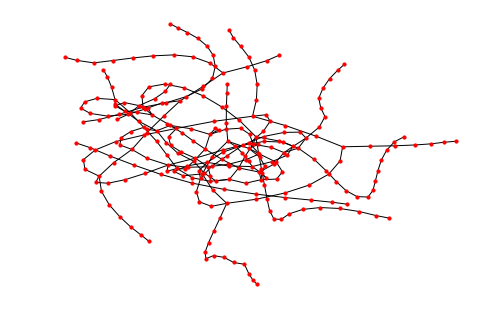

In [73]:
nx.draw(line_conection_graph, with_labels = False, node_size = 10)

In [74]:
def is_goal(desitination):
    def _wrap(current_path):
        return current_path[-1] == desitination
    return _wrap

In [76]:
def search(graph, start, is_goal, search_strategy):
    pathes = [[start] ]
    seen = set()
    print(pathes)
    
    while pathes:
        path = pathes.pop(0)
        froniter = path[-1]
        
        if froniter in seen: continue
            
        successors = graph[froniter]
        
        for city in successors: 
            if city in path: continue
            
            new_path = path+[city]
            
            pathes.append(new_path)
        
            if is_goal(new_path): return new_path
#        print('len(pathes)={}'.format(pathes))
        seen.add(froniter)
        pathes = search_strategy(pathes)
    return 'no path'

In [91]:
search(all_stations_connection, start='望京', is_goal=is_goal('后沙峪'), search_strategy=lambda n: n)

['望京', '望京东', '崔各庄', '马泉营', '孙河', '国展', '花梨坎', '后沙峪']

In [79]:
def sort_path(cmp_func, beam=-1):
    def _sorted(pathes):
        return sorted(pathes, key=cmp_func)[:beam]
    return _sorted

In [82]:
def get_path_distance(path):
    distance = 0
    
    for i, c in enumerate(path[:-1]):
        distance += all_stations_distance[(c, path[i+1])]
    
    return distance    

In [86]:
get_path_distance(['望京','望京西','芍药居'])

3910.0

In [92]:
search(all_stations_connection, start='望京', is_goal=is_goal('双井'), search_strategy=sort_path(get_path_distance, beam=15))

['望京',
 '望京西',
 '芍药居',
 '太阳宫',
 '三元桥',
 '亮马桥',
 '农业展览馆',
 '团结湖',
 '呼家楼',
 '金台夕照',
 '国贸',
 '双井']

In [93]:
def get_total_station(path):
    return len(path)

In [96]:
search(all_stations_connection, start='望京', is_goal=is_goal('双井'), search_strategy=sort_path(get_total_station))